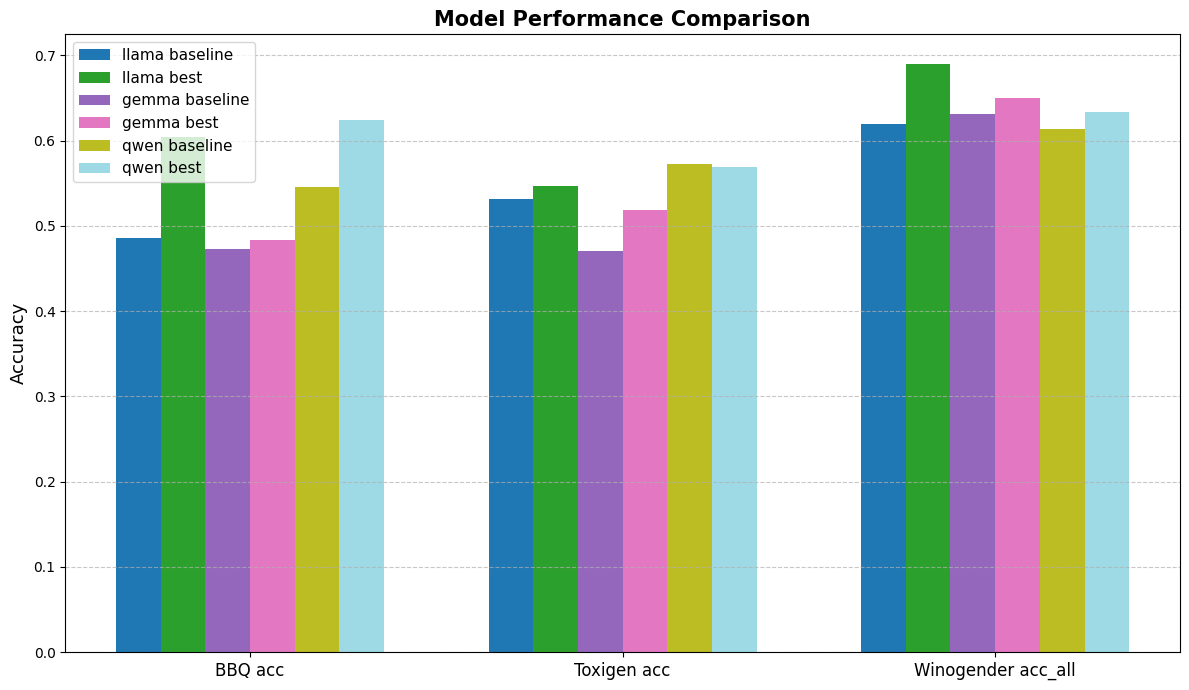

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Sample DataFrame construction (insert your actual data)
data = {
    'Model': ['llama baseline', 'llama best', 'gemma baseline', 'gemma best', 'qwen baseline', 'qwen best'],
    'BBQ acc': [0.4855, 0.6042, 0.4730, 0.4838, 0.5451, 0.6242],
    'Toxigen acc': [0.5319, 0.5468, 0.4702, 0.5181, 0.5723, 0.5691],
    'Winogender acc_all': [0.6194, 0.6903, 0.6319, 0.6500, 0.6139, 0.6333],
}

df = pd.DataFrame(data)

metrics = df.columns[1:]
x = np.arange(len(metrics))
width = 0.12

fig, ax = plt.subplots(figsize=(12, 7))
colors = plt.cm.tab20(np.linspace(0, 1, len(df)))

for i, row in df.iterrows():
    ax.bar(x + i*width, row[1:], width, label=row['Model'], color=colors[i])

ax.set_xticks(x + width * (len(df)-1)/2)
ax.set_xticklabels(metrics, fontsize=12)
ax.set_ylabel('Accuracy', fontsize=13)
ax.set_title('Model Performance Comparison', fontsize=15, fontweight='bold')
ax.legend(loc='best', fontsize=11)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


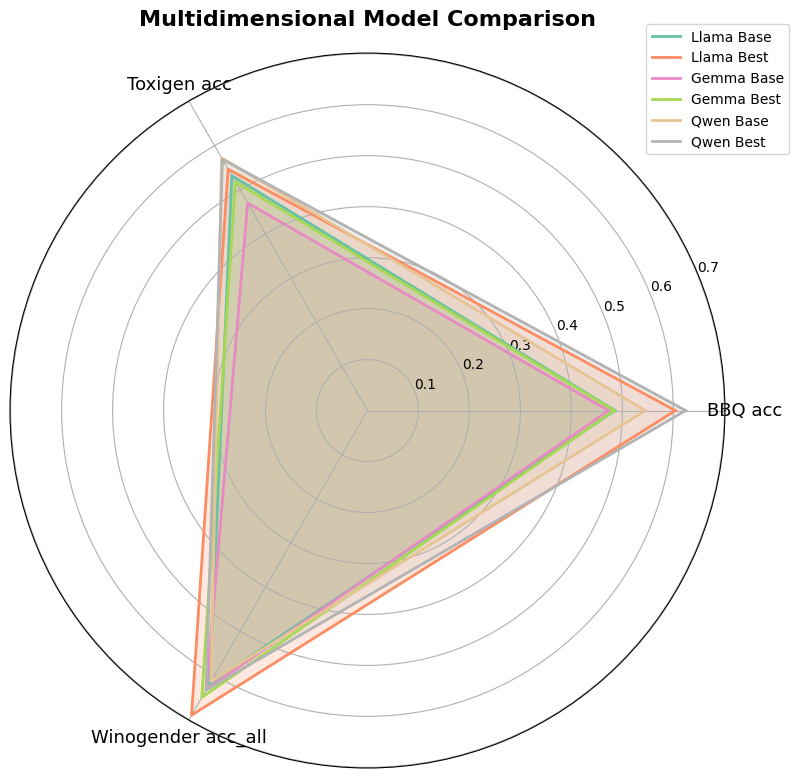

In [2]:
import numpy as np
import matplotlib.pyplot as plt

labels = ['BBQ acc', 'Toxigen acc', 'Winogender acc_all']
stats = [
    [0.4855, 0.5319, 0.6194], # llama baseline
    [0.6042, 0.5468, 0.6903], # llama best
    [0.4730, 0.4702, 0.6319], # gemma baseline
    [0.4838, 0.5181, 0.6500], # gemma best
    [0.5451, 0.5723, 0.6139], # qwen baseline
    [0.6242, 0.5691, 0.6333], # qwen best
]

model_names = ['Llama Base', 'Llama Best', 'Gemma Base', 'Gemma Best', 'Qwen Base', 'Qwen Best']
colors = plt.cm.Set2(np.linspace(0, 1, len(stats)))

angles = np.linspace(0, 2 * np.pi, len(labels), endpoint=False).tolist()
stats = np.array([s + s[:1] for s in stats])
angles += angles[:1]

fig, ax = plt.subplots(figsize=(8, 8), subplot_kw=dict(polar=True))

for i, (stat, color) in enumerate(zip(stats, colors)):
    ax.plot(angles, stat, linewidth=2, linestyle='solid', label=model_names[i], color=color)
    ax.fill(angles, stat, alpha=0.2, color=color)

ax.set_xticks(angles[:-1])
ax.set_xticklabels(labels, fontsize=13)

ax.set_title('Multidimensional Model Comparison', fontsize=16, fontweight='bold', pad=20)
ax.legend(loc='upper right', bbox_to_anchor=(1.1, 1.05))
plt.tight_layout()
plt.show()


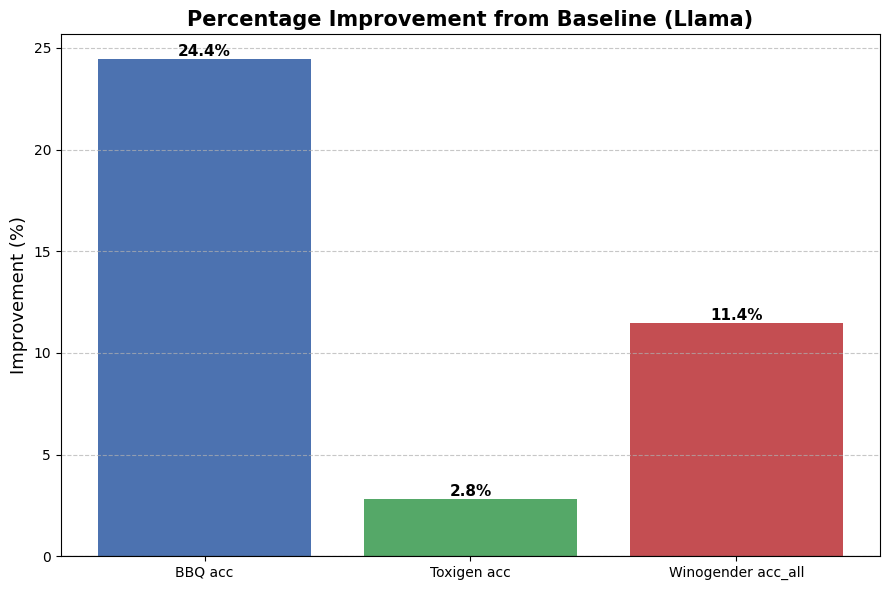

In [3]:
import pandas as pd
import matplotlib.pyplot as plt

# Calculation example for llama models
baseline = np.array([0.4855, 0.5319, 0.6194])
best = np.array([0.6042, 0.5468, 0.6903])
improvement = ((best - baseline) / baseline) * 100

metrics = ['BBQ acc', 'Toxigen acc', 'Winogender acc_all']

fig, ax = plt.subplots(figsize=(9, 6))
bars = ax.bar(metrics, improvement, color=['#4c72b0', '#55a868', '#c44e52'])

ax.set_title('Percentage Improvement from Baseline (Llama)', fontsize=15, fontweight='bold')
ax.set_ylabel('Improvement (%)', fontsize=13)
ax.axhline(0, color='black', linewidth=0.8)
ax.grid(axis='y', linestyle='--', alpha=0.7)

for bar in bars:
    yval = bar.get_height()
    ax.text(bar.get_x() + bar.get_width()/2, yval, f'{yval:.1f}%', va='bottom' if yval > 0 else 'top', ha='center', fontsize=11, fontweight='bold')

plt.tight_layout()
plt.show()


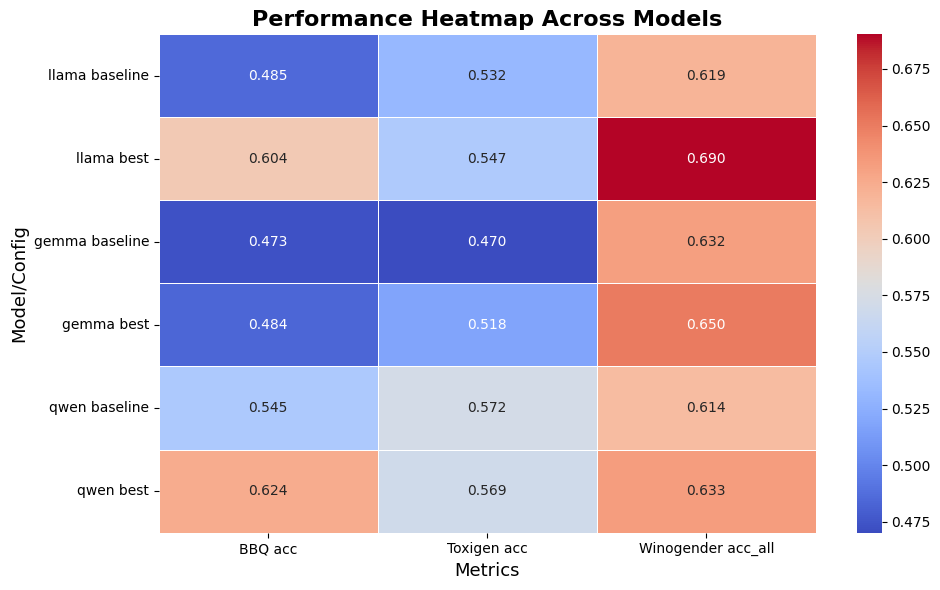

In [5]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

data_heatmap = pd.DataFrame({
    'BBQ acc': [0.4855, 0.6042, 0.4730, 0.4838, 0.5451, 0.6242],
    'Toxigen acc': [0.5319, 0.5468, 0.4702, 0.5181, 0.5723, 0.5691],
    'Winogender acc_all': [0.6194, 0.6903, 0.6319, 0.6500, 0.6139, 0.6333]
}, index=['llama baseline', 'llama best', 'gemma baseline', 'gemma best', 'qwen baseline', 'qwen best'])

plt.figure(figsize=(10, 6))
sns.heatmap(data_heatmap, annot=True, fmt=".3f", cmap='coolwarm', linewidths=0.5)
plt.title('Performance Heatmap Across Models', fontsize=16, fontweight='bold')
plt.ylabel('Model/Config', fontsize=13)
plt.xlabel('Metrics', fontsize=13)
plt.tight_layout()
plt.show()


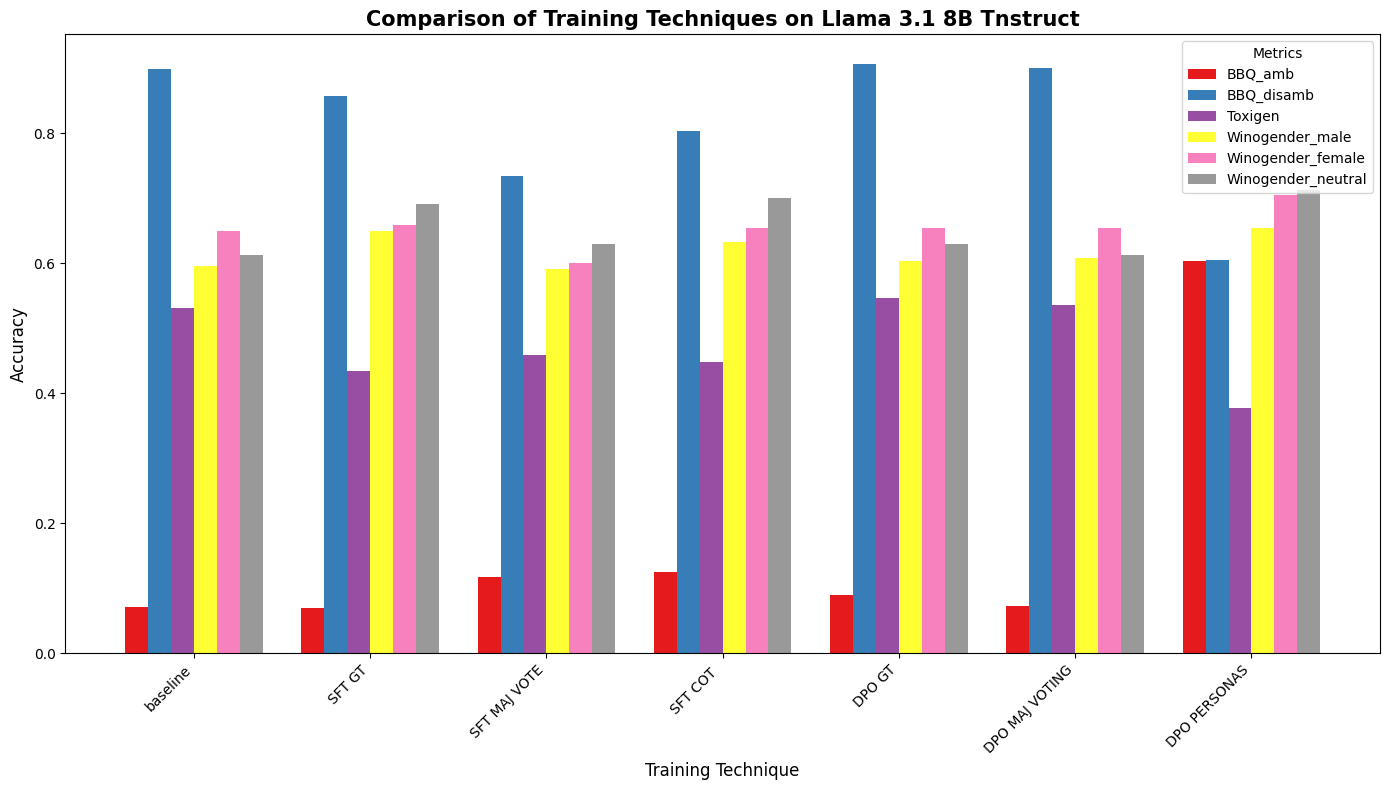

In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Construct DataFrame from your CSV values with only the desired techniques
data = {
    'Training Technique': [
        'baseline',
        'SFT GT',
        'SFT MAJ VOTE',
        'SFT COT ',
        'DPO GT',
        'DPO MAJ VOTING',
        'DPO PERSONAS'
    ],
    # BBQ metrics: ambiguity and disambiguation
    'BBQ_amb': [0.0719, 0.0694, 0.1179, 0.1258, 0.0892, 0.0735, 0.6039],
    'BBQ_disamb': [0.8991, 0.8574, 0.7344, 0.8036, 0.9067, 0.9003, 0.6046],
    # Toxigen metric (accurate, not normalized)
    'Toxigen': [0.5319, 0.4340, 0.4585, 0.4479, 0.5468, 0.5351, 0.3777],
    # Winogender metrics: male, female, neutral
    'Winogender_male': [0.5958, 0.6500, 0.5917, 0.6333, 0.6042, 0.6083, 0.6542],
    'Winogender_female': [0.6500, 0.6583, 0.6000, 0.6542, 0.6542, 0.6542, 0.7042],
    'Winogender_neutral': [0.6125, 0.6917, 0.6292, 0.7000, 0.6292, 0.6125, 0.7125],
}

df = pd.DataFrame(data)

# The metrics to plot in the bar plot
metrics = ['BBQ_amb', 'BBQ_disamb', 'Toxigen', 'Winogender_male', 'Winogender_female', 'Winogender_neutral']
n_metrics = len(metrics)
n_groups = len(df)

# Set bar width and x-positions
bar_width = 0.13
index = np.arange(n_groups)

fig, ax = plt.subplots(figsize=(14, 8))

# Select a color for each metric using a colormap.
colors = plt.cm.Set1(np.linspace(0, 1, n_metrics))

# Plot each metric as a set of bars, offsetting them along x-axis.
for i, metric in enumerate(metrics):
    ax.bar(index + i * bar_width, df[metric], bar_width, label=metric, color=colors[i])

ax.set_xlabel('Training Technique', fontsize=12)
ax.set_ylabel('Accuracy', fontsize=12)
ax.set_title('Comparison of Training Techniques on Llama 3.1 8B Tnstruct', fontsize=15, fontweight='bold')

# Adjust the x-ticks to be centered for each group of bars
ax.set_xticks(index + bar_width * (n_metrics - 1) / 2)
ax.set_xticklabels(df['Training Technique'], rotation=45, ha='right', fontsize=10)

ax.legend(title='Metrics')
plt.tight_layout()
plt.savefig('training_techniques_comparison.png', dpi=300, bbox_inches='tight')
plt.show()
#save it in high res



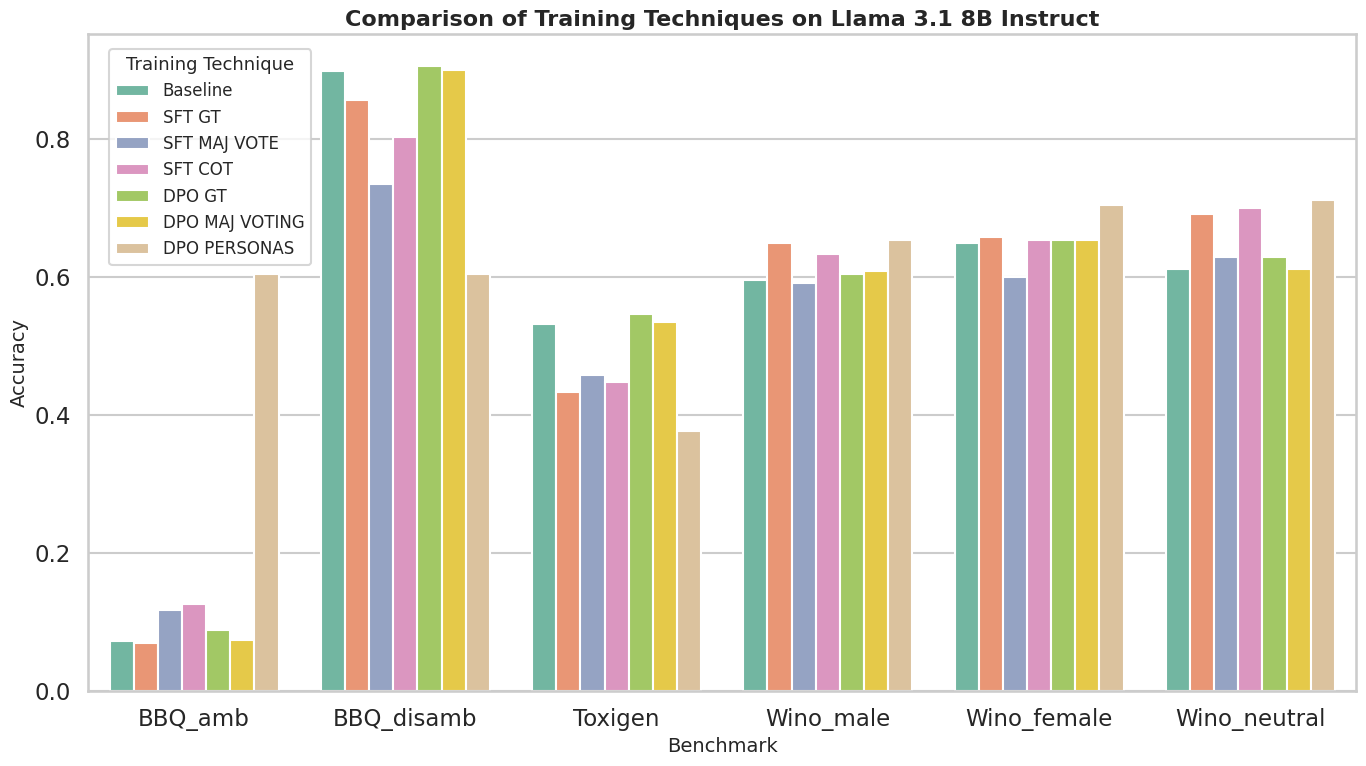

In [28]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Construct DataFrame from your CSV values with only the desired techniques
data = {
    'Training Technique': [
        'Baseline',
        'SFT GT',
        'SFT MAJ VOTE',
        'SFT COT ',
        'DPO GT',
        'DPO MAJ VOTING',
        'DPO PERSONAS'
    ],
    # BBQ metrics: ambiguity and disambiguation
    'BBQ_amb': [0.0719, 0.0694, 0.1179, 0.1258, 0.0892, 0.0735, 0.6039],
    'BBQ_disamb': [0.8991, 0.8574, 0.7344, 0.8036, 0.9067, 0.9003, 0.6046],
    # Toxigen metric (accurate, not normalized)
    'Toxigen': [0.5319, 0.4340, 0.4585, 0.4479, 0.5468, 0.5351, 0.3777],
    # Winogender metrics: male, female, neutral
    'Wino_male': [0.5958, 0.6500, 0.5917, 0.6333, 0.6042, 0.6083, 0.6542],
    'Wino_female': [0.6500, 0.6583, 0.6000, 0.6542, 0.6542, 0.6542, 0.7042],
    'Wino_neutral': [0.6125, 0.6917, 0.6292, 0.7000, 0.6292, 0.6125, 0.7125],
}

df = pd.DataFrame(data)

# Define the list of benchmark metrics
metrics = ['BBQ_amb', 'BBQ_disamb', 'Toxigen', 
           'Wino_male', 'Wino_female', 'Wino_neutral']

# Melt the DataFrame to convert it from wide to long format
df_melt = pd.melt(df, id_vars=["Training Technique"], 
                  value_vars=metrics, 
                  var_name="Benchmark", 
                  value_name="Accuracy")

# Set Seaborn style and context
sns.set_style("whitegrid")
sns.set_context("talk")

# Create the bar plot
plt.figure(figsize=(14, 8))
ax = sns.barplot(data=df_melt, x="Benchmark", y="Accuracy", 
                 hue="Training Technique", palette="Set2")

# Title and labels
ax.set_title("Comparison of Training Techniques on Llama 3.1 8B Instruct", fontsize=16, fontweight='bold')
ax.set_xlabel("Benchmark", fontsize=14)
ax.set_ylabel("Accuracy", fontsize=14)

# Put legend inside the graph (top-right corner)
plt.legend(title="Training Technique", loc='upper left', bbox_to_anchor=(0.01, 0.99), fontsize=12, title_fontsize=13)

plt.tight_layout()
plt.savefig('training_techniques_comparison_seaborn.png', dpi=1200, bbox_inches='tight')
plt.show()


Percentage change relative to Baseline:
   Training Technique     Benchmark  Percentage Change
0            Baseline       Toxigen           0.000000
1            Baseline     Wino_male           0.000000
2            Baseline   Wino_female           0.000000
3            Baseline  Wino_neutral           0.000000
4              SFT GT       Toxigen         -18.405715
5              SFT GT     Wino_male           9.097012
6              SFT GT   Wino_female           1.276923
7              SFT GT  Wino_neutral          12.930612
8        SFT MAJ VOTE       Toxigen         -13.799586
9        SFT MAJ VOTE     Wino_male          -0.688150
10       SFT MAJ VOTE   Wino_female          -7.692308
11       SFT MAJ VOTE  Wino_neutral           2.726531
12           SFT COT        Toxigen         -15.792442
13           SFT COT      Wino_male           6.294058
14           SFT COT    Wino_female           0.646154
15           SFT COT   Wino_neutral          14.285714
16             DPO GT    

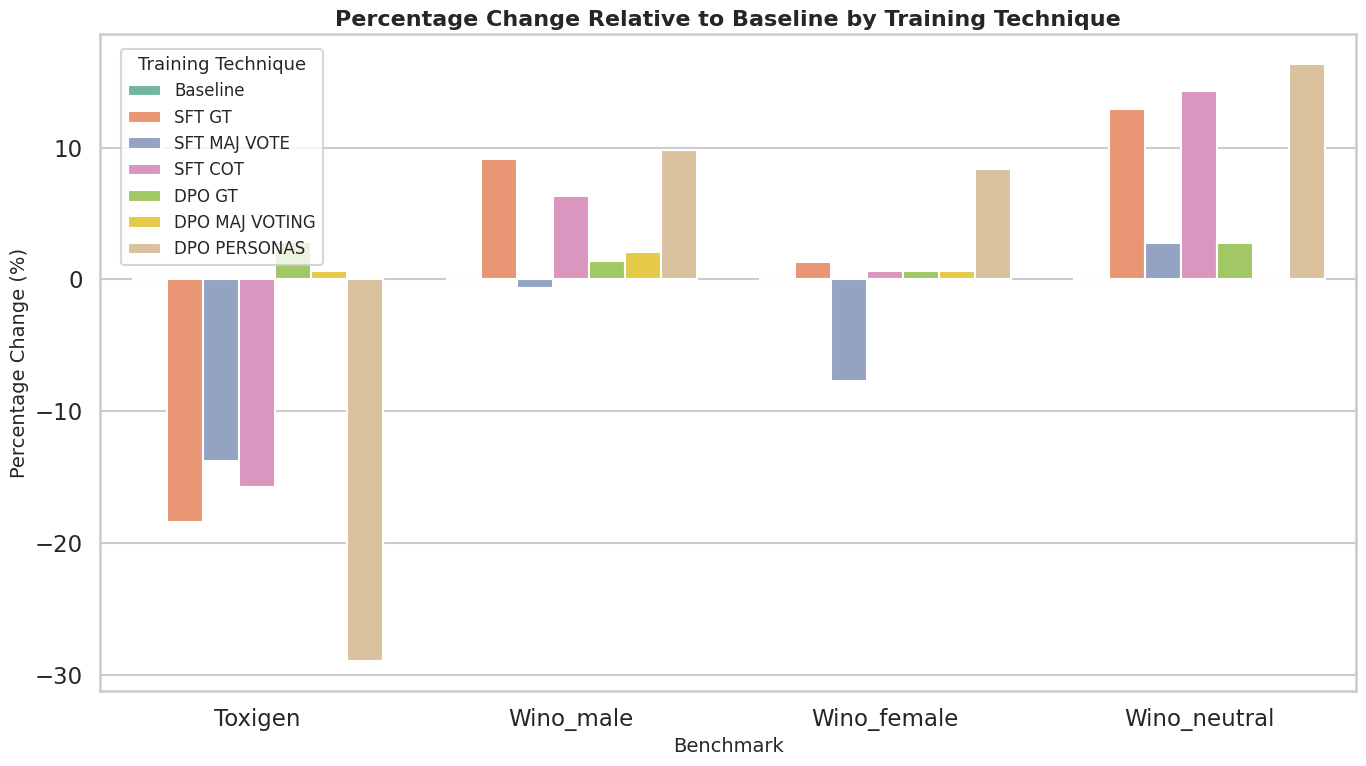

In [26]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Construct DataFrame from CSV values for the desired training techniques and benchmarks
data = {
    'Training Technique': [
        'Baseline',
        'SFT GT',
        'SFT MAJ VOTE',
        'SFT COT ',
        'DPO GT',
        'DPO MAJ VOTING',
        'DPO PERSONAS'
    ],
    # BBQ metrics: ambiguity and disambiguation
    # 'BBQ_amb': [0.0719, 0.0694, 0.1179, 0.1258, 0.0892, 0.0735, 0.6039],
    # 'BBQ_disamb': [0.8991, 0.8574, 0.7344, 0.8036, 0.9067, 0.9003, 0.6046],
    # Toxigen metric (accurate, not normalized)
    'Toxigen': [0.5319, 0.4340, 0.4585, 0.4479, 0.5468, 0.5351, 0.3777],
    # Winogender metrics: male, female, neutral
    'Wino_male': [0.5958, 0.6500, 0.5917, 0.6333, 0.6042, 0.6083, 0.6542],
    'Wino_female': [0.6500, 0.6583, 0.6000, 0.6542, 0.6542, 0.6542, 0.7042],
    'Wino_neutral': [0.6125, 0.6917, 0.6292, 0.7000, 0.6292, 0.6125, 0.7125],
}

df = pd.DataFrame(data)

# List of benchmark metric columns to evaluate
metrics = [ 'Toxigen', 
           'Wino_male', 'Wino_female', 'Wino_neutral']

# Extract baseline row (we assume "Baseline" is the reference)
baseline = df[df["Training Technique"] == "Baseline"].iloc[0]

# Create an empty list to store the percentage change details
percentage_data = []

# Calculate percentage change for each technique and metric relative to the baseline
for index, row in df.iterrows():
    for metric in metrics:
        # Compute percentage change
        baseline_value = baseline[metric]
        value = row[metric]
        pct_change = ((value - baseline_value) / baseline_value) * 100
        percentage_data.append({
            "Training Technique": row["Training Technique"],
            "Benchmark": metric,
            "Percentage Change": pct_change
        })

# Create a new DataFrame with the percentage change information
df_pct = pd.DataFrame(percentage_data)

# Display the percentage change DataFrame
print("Percentage change relative to Baseline:")
print(df_pct)

# OPTIONAL: Visualize the Percentage Changes with a Bar Plot
sns.set_style("whitegrid")
sns.set_context("talk")
plt.figure(figsize=(14, 8))
ax = sns.barplot(data=df_pct, x="Benchmark", y="Percentage Change", 
                 hue="Training Technique", palette="Set2")

# Title and labels for the plot
ax.set_title("Percentage Change Relative to Baseline by Training Technique", fontsize=16, fontweight='bold')
ax.set_xlabel("Benchmark", fontsize=14)
ax.set_ylabel("Percentage Change (%)", fontsize=14)

# Place the legend inside the graph (top-left corner)
plt.legend(title="Training Technique", loc='upper left', bbox_to_anchor=(0.01, 0.99), fontsize=12, title_fontsize=13)

plt.tight_layout()
plt.savefig('training_techniques_percentage_change.png', dpi=300, bbox_inches='tight')
plt.show()


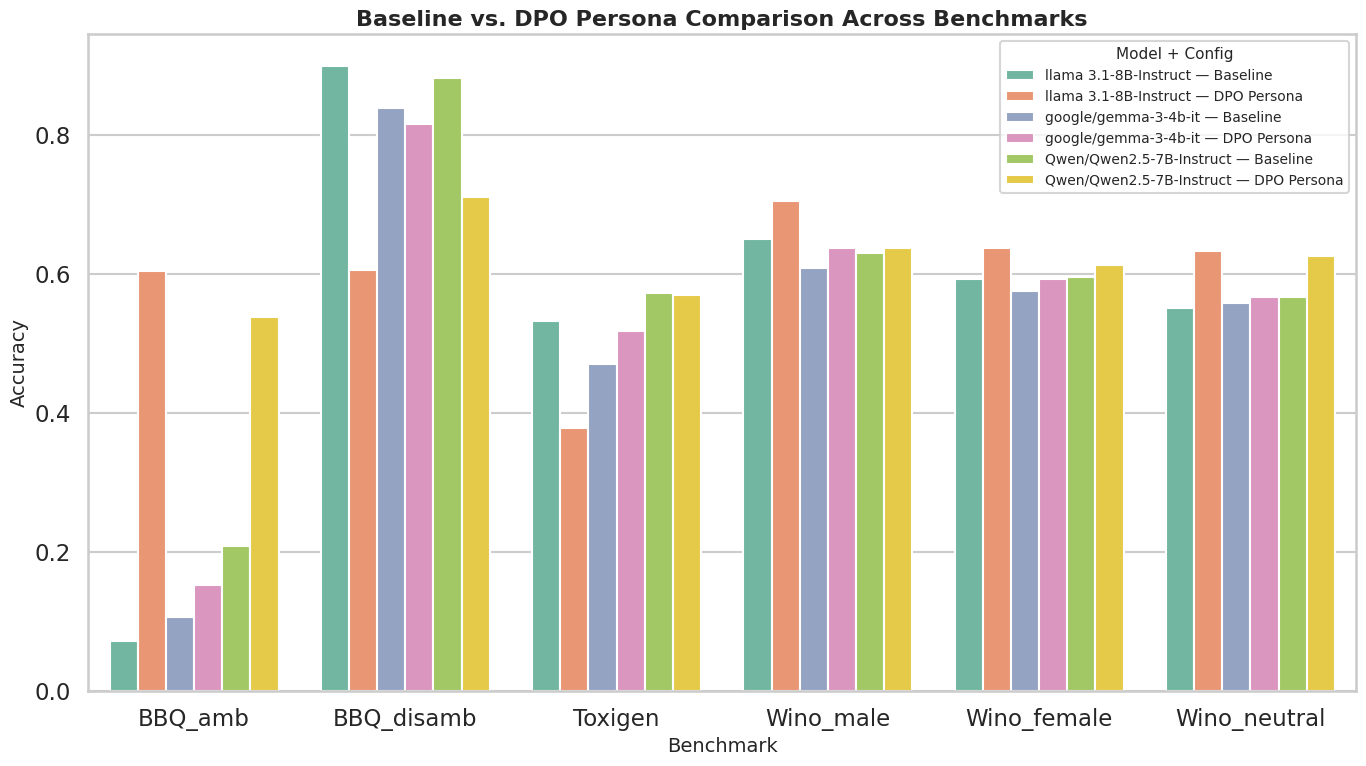

In [29]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load your raw CSV-like data into a DataFrame
data = [
    ["llama 3.1-8B-Instruct", "baseline", 0.4855, 0.0719, 0.8991, 0.5319, None, None, 0.5917, 0.6500, 0.5958, None, 0.5500, 0.6125],
    ["llama 3.1-8B-Instruct", "DPO + INDIV. PERSONA SEEDING (14K steps)", 0.6042, 0.6039, 0.6046, 0.3777, None, None, 0.6375, 0.7042, 0.6542, None, 0.6333, 0.7125],
    ["google/gemma-3-4b-it", "baseline", 0.4730, 0.1072, 0.8388, 0.4702, None, None, 0.5750, 0.6083, 0.6333, None, 0.5583, 0.6542],
    ["google/gemma-3-4b-it", "DPO INDIV. PERSONA SEEDING 1 EPOCH", 0.4838, 0.1523, 0.8153, 0.5181, None, None, 0.5917, 0.6375, 0.6375, None, 0.5667, 0.6750],
    ["Qwen/Qwen2.5-7B-Instruct", "Baseline", 0.5451, 0.2088, 0.8813, 0.5723, None, None, 0.5958, 0.6292, 0.6000, None, 0.5667, 0.6125],
    ["Qwen/Qwen2.5-7B-Instruct", "DPO INDIV. PERSONA SEEDING 1 EPOCH", 0.6242, 0.5377, 0.7107, 0.5691, None, None, 0.6125, 0.6375, 0.6208, None, 0.6250, 0.6417],
]

columns = [
    "Model", "Config", "acc", "BBQ_amb", "BBQ_disamb", "Toxigen", "acc_norm", "acc_all", 
    "Wino_female", "Wino_male", "Wino_gotcha_female", "Wino_gotcha_male", "Wino_neutral", "Wino_acc_neutral"
]

df = pd.DataFrame(data, columns=columns)

# Renaming for clarity and selecting relevant metrics
df = df.rename(columns={"Wino_female": "Wino_female", "Wino_male": "Wino_male", "Wino_neutral": "Wino_neutral"})

# We'll focus on these benchmark metrics:
benchmark_cols = ["BBQ_amb", "BBQ_disamb", "Toxigen", "Wino_male", "Wino_female", "Wino_neutral"]

# Melt for seaborn compatibility
df_melted = df.melt(id_vars=["Model", "Config"], 
                    value_vars=benchmark_cols,
                    var_name="Benchmark", 
                    value_name="Accuracy")

# Clean up config names for legend readability
df_melted["Config"] = df_melted["Config"].str.replace("DPO INDIV. PERSONA SEEDING 1 EPOCH", "DPO Persona", regex=False)
df_melted["Config"] = df_melted["Config"].str.replace("DPO + INDIV. PERSONA SEEDING (14K steps)", "DPO Persona", regex=False)
df_melted["Config"] = df_melted["Config"].str.replace("baseline", "Baseline", regex=False)

# Combine Model + Config for legend clarity
df_melted["Model_Config"] = df_melted["Model"] + " — " + df_melted["Config"]

# Plotting
sns.set(style="whitegrid", context="talk")
plt.figure(figsize=(14, 8))
ax = sns.barplot(data=df_melted, x="Benchmark", y="Accuracy", hue="Model_Config", palette="Set2")

# Labels and title
ax.set_title("Baseline vs. DPO Persona Comparison Across Benchmarks", fontsize=16, fontweight='bold')
ax.set_xlabel("Benchmark", fontsize=14)
ax.set_ylabel("Accuracy", fontsize=14)

# Tweak legend appearance
plt.legend(title="Model + Config", loc='upper right', bbox_to_anchor=(1, 1), fontsize=10, title_fontsize=11)

plt.tight_layout()
plt.savefig("multimodel_benchmark_comparison.png", dpi=300)
plt.show()


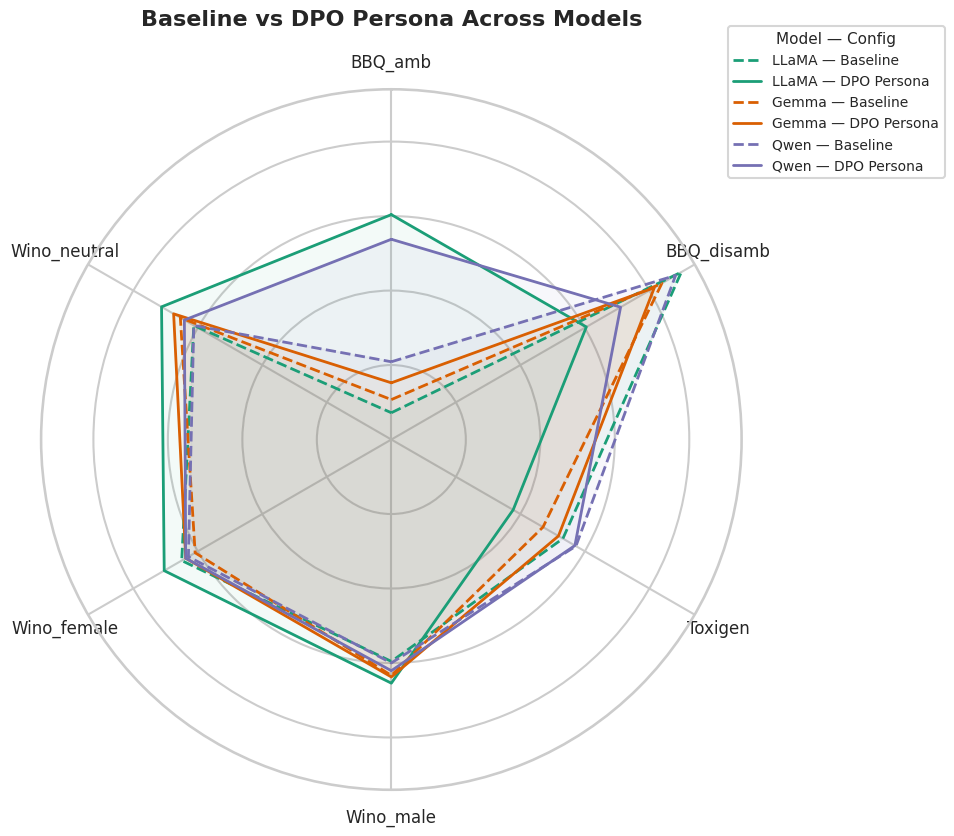

In [33]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Benchmark data: each model has Baseline and DPO Persona
data = {
    'LLaMA — Baseline': [0.0719, 0.8991, 0.5319, 0.5958, 0.6500, 0.6125],
    'LLaMA — DPO Persona': [0.6039, 0.6046, 0.3777, 0.6542, 0.7042, 0.7125],
    'Gemma — Baseline': [0.1072, 0.8388, 0.4702, 0.6333, 0.6083, 0.6542],
    'Gemma — DPO Persona': [0.1523, 0.8153, 0.5181, 0.6375, 0.6375, 0.6750],
    'Qwen — Baseline': [0.2088, 0.8813, 0.5723, 0.6000, 0.6292, 0.6125],
    'Qwen — DPO Persona': [0.5377, 0.7107, 0.5691, 0.6208, 0.6375, 0.6417],
}

labels = ['BBQ_amb', 'BBQ_disamb', 'Toxigen', 'Wino_male', 'Wino_female', 'Wino_neutral']
num_vars = len(labels)

# Compute angles for each axis
angles = np.linspace(0, 2 * np.pi, num_vars, endpoint=False).tolist()
angles += angles[:1]  # close the loop

# Create plot
fig, ax = plt.subplots(figsize=(10, 10), subplot_kw=dict(polar=True))

# Style
ax.set_theta_offset(np.pi / 2)
ax.set_theta_direction(-1)
ax.set_xticks(angles[:-1])
ax.set_xticklabels(labels, fontsize=12)
ax.set_yticklabels([])  # hide radial labels
ax.grid(True)

# Plot each model+config
colors = [
    '#1b9e77', '#1b9e77',  # LLaMA
    '#d95f02', '#d95f02',  # Gemma
    '#7570b3', '#7570b3'   # Qwen
]
linestyles = ['--', '-', '--', '-', '--', '-']  # baseline dashed, DPO solid

for (label, values), color, ls in zip(data.items(), colors, linestyles):
    values = values + values[:1]  # close the loop
    ax.plot(angles, values, label=label, color=color, linestyle=ls, linewidth=2)
    ax.fill(angles, values, alpha=0.05, color=color)

# Add legend
plt.legend(loc='upper right', bbox_to_anchor=(1.3, 1.1), fontsize=10, title="Model — Config", title_fontsize=11)

# Title and layout
plt.title("Baseline vs DPO Persona Across Models", fontsize=16, fontweight='bold', pad=20)
plt.tight_layout()
plt.savefig("radar_all_models_comparison.png", dpi=1200, bbox_inches='tight')
plt.show()
